# Sources & Sinks in a Freestream

A *freestream* is the fluid far upstream of an aerodynamic body, that is, before the body has the chance to deflect, slow down, or compress the fluid when coming into contact with it. Freestream conditions are usually denoted with an infinity subscript.

Firstly we'll build a grid of points just as we did in the last module.

In [144]:
# Number of points
N = 100
# Max and min
x = (-4.0, 4.0)
y = (-2.0, 2.0)
# Linspaces
X = range(x[1], x[2], N)
Y = range(y[1], y[2], N);

Here we introduce structures (in Python these are similar to classes) for a singularity, as well as a freestream.

In [145]:
struct singularity_point
    kind::String
    strength::Float32
    x_pos::Number
    y_pos::Number
end

struct freestream
    speed::Number
    # angle in radians
    angle::Number
end;

## Source in a Uniform Flow

The streamlines of a freestream $\psi_\text{freestream}$ with speed $U_\infty$ and an incident angle $\alpha$ are given by

$$ \psi_\text{freestream}(x,y) = U_\infty(y\cos\alpha-x\sin\alpha) $$

Quickly, ensure that this expression agrees with our intuition. If the freestream is completely parallel with the $x$-axis, $\alpha=0$ and our freestream becomes $\psi(x,y)=U_\infty y$. More generally, the streamlines of $\psi_\text{freestream}$ are all parallel lines which make an angle $\alpha$ with the $x$-axis. With this in mind, we'll start by creating a velocity vector field for a freestream of uniform horizontal flow, that is, with a constant strength and incident angle $\alpha=0$.

In [191]:
using CairoMakie # Point2{Float64}

# Freestream
freestream_speed = 1.0
alpha = 0
fs = freestream(freestream_speed, alpha)

# Strength of the source
strength_source = 5.0   
# Position of source
x_source, y_source = -1.0, 0.0 

# Source singularity
source_field = singularity_point("Source", strength_source, x_source, y_source);

With the source field and freestream in hand we can once again exercise our superposition muscles to determine the streamlines of the overall vector field:

$$ \psi= \psi_\text{freestream}+\psi_\text{source} = U_\infty y + \frac{\Lambda}{2\pi}\tan^{-1}\left(\frac{y-y_\text{source}}{x-x_\text{source}}\right)$$

The stream function for the source $\psi_\text{source}$ was developed in Module 1 and taken from there. Because differentiaton is a linear operator and the components of the velocity vector field are related to the stream function via differentiation (again, Module 1), we can determine the $x$ and $y$ components of the velocity field by superposition as well. 

An interesting phenomenon that occurs for a source in a freestream is the creation of a *stagnation point* where the magnitude of the velocity goes to zero. So, we need to determine the points in the vector field where both components of the velocity vector are zero. In other words, we need to solve the set equations

$$ u(x,y) = u_\text{freestream} + u_\text{source} = 0 $$
$$ v(x,y) = v_\text{freestream} + v_\text{source} = 0 $$

where $\textbf{v}(x,y)=(u,v)$ is the velocity vector field and $u_\text{i}(x,y)$ and $v_\text{i}(x,y)$ are the respective $x$ and $y$ components of the velocity vector, freestream, and source. We determined the $x$ and $y$ components of the source in Module 1, so here they are:

$$\textbf{v}(x,y) = \frac{\Lambda}{2\pi}\left(\frac{x-x_\text{source}}{(x-x_\text{source})^2+(y-y_\text{source})^2},~\frac{y-y_\text{source}}{{(x-x_\text{source})^2+(y-y_\text{source})^2}}\right)$$

To determine the respective components of the freestream, recall how we can relate $\psi$ to $u$ and $v$:

$$u(x,y) = \frac{\partial\psi}{\partial y},\quad v(x,y)=-\frac{\partial\psi}{\partial x}$$

Now, determing $u_\text{freestream}$ and $v_\text{freestream}$ equates to a little bit of differentiation:

$$u_\text{freestream} = \frac{\partial\psi}{\partial y} = \frac{\partial}{\partial y}\left[U_\infty y\right] = U_\infty$$
$$v_\text{freestream} = -\frac{\partial\psi}{\partial x} = -\frac{\partial}{\partial x}\left[U_\infty y\right] = 0$$

The stagnation point can now be determined for a source within a freestream. Firstly, the $y$-component:

$$ 0 =  v_\text{freestream} + v_\text{source} = 0 + \frac{\Lambda}{2\pi}\frac{y_\text{stagnation}-y_\text{source}}{{(x-x_\text{source})^2+(y-y_\text{source})^2}} $$

Clearly, this is solved by $y_\text{stagnation} = y_\text{source}$. Now, we can solve for the $x$-component while applying the condition that $y_\text{stagnation} = y_\text{source}$:

$$ 0 =  u_\text{freestream} + u_\text{source} = U_\infty + \frac{\Lambda}{2\pi}\frac{x_\text{stagnation}-x_\text{source}}{{(x_\text{stagnation}-x_\text{source})^2+(y_\text{stagnation}-y_\text{source})^2}} = U_\infty + \frac{\Lambda}{2\pi}\frac{x_\text{stagnation}-x_\text{source}}{{(x_\text{stagnation}-x_\text{source})^2}}$$

$$ 0 = U_\infty + \frac{\Lambda}{2\pi}\frac{1}{{x_\text{stagnation}-x_\text{source}}} ~\Rightarrow~ x_\text{stagnation} = x_\text{source}-\frac{\Lambda}{2\pi U_\infty}$$

Thus, we have the that the stagnant point for a source in a freestream is

$$\text{stagnation} = \left(x_\text{source}-\frac{\Lambda}{2\pi U_\infty},~y_\text{source}\right)$$


In [194]:
# Stagnation point
x_stag = source_field.x_pos - source_field.strength/(2*pi*fs.speed)
y_stag = source_field.y_pos;

Now, we can build a function to determine the components of the velocity vector for each point $(x,y)$ in the grid built above. Then, a streamplot can be made and a contour plot is built to illustrate the stagnation lines. The contours of the stagnation streamlines are derived below.

In [192]:
function source_horizontal_freestream(
        source::singularity_point, 
        fs::freestream, 
        x::Point2{Float64}
    )
    """
    source = singularity point
    fs = freestream
    x = x & y positions of vector field
    """
    # Separating tuple
    x, y = x[1], x[2]
    
    # Source
    us = (source.strength/(2*pi) * (x-source.x_pos)/((x-source.x_pos)^2 + (y-source.y_pos)^2))
    vs = (source.strength/(2*pi) * (y-source.y_pos)/((x-source.x_pos)^2 + (y-source.y_pos)^2))
    psi_s = (source.strength /(2*pi)) * atan((y - source.y_pos), (x - source.x_pos))
    
    # Freestream 
    uf = fs.speed
    vf = 0
    psi_f = fs.speed * y
    
    # Superposition of outputs
    # Return point (u,v) for the streamplot
    # also return the streamline psi
    return Point(us+uf, vs+vf), psi_s+psi_f
end;

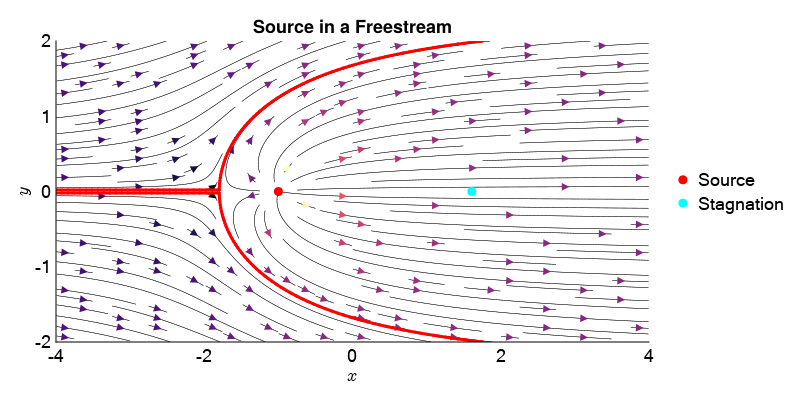

In [200]:
using LaTeXStrings

# Building figure
f = Figure(resolution=(800, 400))
set_theme!(
    theme_minimal(),
    font = "CM Sans Serif",
    fontsize = 18
)
# Axis to plot on
ax = Axis(
    f[1,1],
    title = "Source in a Freestream", 
    xlabel = L"$x$",
    ylabel = L"$y$"
)
xlims!(minimum(X), maximum(X))
ylims!(minimum(Y), maximum(Y))

# Plotting
streamplot!(ax, 
    x -> source_horizontal_freestream(source_field, fs, x)[1], X, Y,
    color = :black,
    colormap = :magma, 
    linewidth = 0.5
)

# Contour 
# Levels of the contour plot are determined below
Z = [source_horizontal_freestream(source_field, fs, Point2(x, y))[2] for x in X, y in Y]
contour!(X, Y, Z, 
    levels = [-source_field.strength/2, source_field.strength/2],
    color = :red, 
    linewidth = 3
)

# Scatter
sc_source = scatter!(ax, (source_field.x_pos, source_field.y_pos), color=:red)
sc_stagnation = scatter!(ax, (x_stag, y_stag), color=:cyan)

# Legend
Legend(f[1,2], [sc_source, sc_stagnation], ["Source", "Stagnation"])

# Displaying figure
current_figure()

The shape of the contour above makes it seem like the freestream, coming from the left, is being redirected to either side of the dividing lines in black. If we ignore the airflow within this dividing line, we might imagine that the region containing the source is a solid body. This body has a name, in fact, and is referred to as a *Rankine half body*.

The Rankine half body is well-studied and gives us insight into the shape and limiting behavior of the streamlines above. The most basic fact of the Rankine half body that we can determine with ease is where it begins. In the plot above, we see that it "starts" at the stagnation point. What are these coordinates? From analysis done earlier, we have the coordinates of the stagnation point. The distance between the stagnation point and source is found easily:

$$\left|x_\text{stagnation}-x_\text{source}\right| = \left|x_\text{source}-\frac{\Lambda}{2\pi U_\infty}-x_\text{source}\right| = \frac{\Lambda}{2\pi U_\infty}$$

This parameter is often just referred to as $b$ so that $b=\Lambda/(2\pi U_\infty)$. Now, for *any* source in a freestream, we have a way of easily determining where the stagnation point will be, granted we know the strength of the source and the speed of the freestream. 

The *stagnation streamlines* can be determined using $b$ by evaluating $\psi=\psi_\text{freestream} + \psi_\text{source}$ at a radial distance of $r=b$ and an angle of $\theta=\pi$. An angle of $\pi$ is chosen because it is at this angle which the $y$ components of the velocity for the source and freestream cancel. Also, we'll briefly convert $\psi$ into polar coordinates because it's easier to work with and refer to variables this way:

$$\psi = \psi_\text{freestream} + \psi_\text{source} = U_\infty r\sin\theta + \frac{\Lambda}{2\pi}\theta$$
$$\psi(r=b, \theta=\pi) = \frac{\Lambda}{2}$$

The same streamlines in the negative $y$ direction occur at $\theta=-\pi$, so that $\psi=-\Lambda/2$ is another solution to the stagnation streamline. This result was used in the block of code above to define the levels used for the contour plot. We now have an equation for the outline of the Rankine half body:

$$\psi = \psi_\text{freestream} + \psi_\text{source} ~\Rightarrow~ \frac{\Lambda}{2} = U_\infty r\sin\theta + \frac{\Lambda}{2\pi}\theta$$

Substituting $b=\Lambda/(2\pi U_\infty)$ into this expression and a little bit of algebraic gymnastics affords an elegant expression for the radial distance $r$ of as a function of the angle $\theta$:

$$\Rightarrow~ \pi bU_\infty = U_\infty r\sin\theta + bU_\infty\theta$$

$$r(\theta) = \frac{b(\pi-\theta)}{\sin\theta} $$

Now we can determine the maximim width of the Rankine half body. This width is achieved as the distance from the stagnation point goes to infinity, or, as the angle of the freestream lines with the $x$-axis goes to zero. These conditions require that $\theta\to0$ to achieve a maximum width (or $\theta\to2\pi$ in the opposite direction) so that the maximum height is achieved at $y=b\theta$ (and $y=-b\theta$ in the other specified limit) and the maximum width is therefore

$$\text{max width} = 2\pi b = \frac{\Lambda}{U_\infty}$$

## Source-Sink Pair in a Freestream

Superposition allows us to add a sink to the freestream with little effort! Though, a new function is defined to allow an easier calculation of the velocity vector components in a grid of a source *and* sink within the freestream. 

In [150]:
# strength of the sink
strength_sink = -5.0     
# location of the sink
x_sink, y_sink = 1.0, 0.0   
# singularity
sink_field = singularity_point("Sink", strength_sink, x_sink, y_sink);

In [151]:
function source_sink_horizontal_freestream(
        source::singularity_point, 
        sink::singularity_point, 
        fs::freestream, 
        x::Point2{Float64}
    )
    """
    source = singularity point
    sink = singularity point
    fs = freestream
    x = x & y positions of vector field
    """
    # Separating tuple
    x, y = x[1], x[2]
    
    # Source
    usrc = (source.strength/(2*pi) * (x-source.x_pos)/((x-source.x_pos)^2 + (y-source.y_pos)^2))
    vsrc = (source.strength/(2*pi) * (y-source.y_pos)/((x-source.x_pos)^2 + (y-source.y_pos)^2))
    psi_src = (source.strength /(2*pi)) * atan((y - source.y_pos), (x - source.x_pos))
    
    # Sink
    usnk = (sink.strength/(2*pi) * (x-sink.x_pos)/((x-sink.x_pos)^2 + (y-sink.y_pos)^2))
    vsnk = (sink.strength/(2*pi) * (y-sink.y_pos)/((x-sink.x_pos)^2 + (y-sink.y_pos)^2))
    psi_snk = (sink.strength /(2*pi)) * atan((y - sink.y_pos), (x - sink.x_pos))
    
    # Freestream 
    uf = fs.speed
    vf = 0
    psi_f = fs.speed * y
    
    # Superposition of outputs
    # Return point (u,v) for the streamplot
    # also return the streamline psi
    return Point(usrc+usnk+uf, vsrc+vsnk+vf), psi_src+psi_snk+psi_f
end;

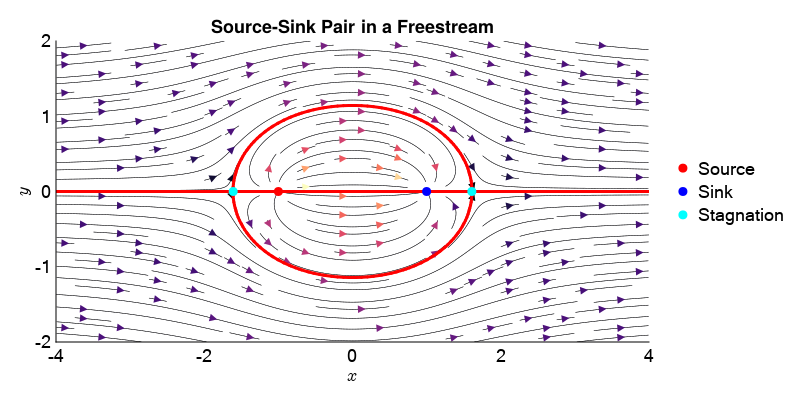

In [199]:
using LaTeXStrings

#Building figure
f = Figure(resolution=(800, 400))

ax = Axis(
    f[1,1],
    title = "Source-Sink Pair in a Freestream", 
    xlabel = L"$x$",
    ylabel = L"$y$"
)
xlims!(minimum(X), maximum(X))
ylims!(minimum(Y), maximum(Y))

# Plotting
streamplot!(ax, 
    x -> source_sink_horizontal_freestream(source_field, sink_field, fs, x)[1], X, Y,
    color = :black,
    colormap = :magma, 
    linewidth = 0.5
)

# Contour 
Z = [source_sink_horizontal_freestream(source_field, sink_field, fs, Point2(x, y))[2] for x in X, y in Y]
contour!(X, Y, Z, 
    levels = 1,
    color = :red, 
    linewidth = 3
)
sc_source = scatter!(ax, (source_field.x_pos, source_field.y_pos), color=:red)
sc_sink = scatter!(ax, (sink_field.x_pos, sink_field.y_pos), color=:blue)

# Stagnation points
x_stag = sqrt((source_field.strength*sink_field.x_pos/pi/fs.speed)+(source_field.x_pos)^2)
y_stag = sink_field.y_pos

sc_stag_pos = scatter!(ax, (x_stag, y_stag), color=:cyan)
sc_stag_neg = scatter!(ax, (-x_stag, y_stag), color=:cyan)

# legend
Legend(f[1,2], [sc_source, sc_sink, sc_stag_pos], ["Source", "Sink", "Stagnation"])

# Displaying figure
current_figure()

In contrast to when only a source was present in the freestream, a source-sink pair gives rise to an oval-looking shape, aptly named the *Rankine oval*. Similar to the half body, the Rankine oval is well-studied and provides a useful approximation for reality.

Some parameters of interest for the Rankine oval of interest are the length and width, each of which can be readily determined with all of the information we have. To determine the length we first need to locate the stagnation points. By symmetry we can deduce that a stagnant point will lie along on the same $y$ value as the source and sink so that $y=y_\text{source}=y_\text{sink}$. Now, we need to solve for the $x$ component:

$$u = 0 = u_\text{freestream} + u_\text{source} + u_\text{sink} = U_\infty + \frac{\Lambda_\text{source}}{2\pi}\frac{x_\text{stagnant}-x_\text{source}}{(x_\text{stagnant}-x_\text{source})^2+(y_\text{stagnant}-y_\text{source})^2} + \frac{\Lambda_\text{sink}}{2\pi}\frac{x_\text{stagnant}-x_\text{sink}}{(x_\text{stagnant}-x_\text{sink})^2+(y_\text{stagnant}-y_\text{sink})^2}$$

$$0 = U_\infty + \frac{\Lambda_\text{source}}{2\pi}\frac{1}{x_\text{stagnant}-x_\text{source}} + \frac{\Lambda_\text{sink}}{2\pi}\frac{1}{x_\text{stagnant}-x_\text{sink}}$$

For the sake of simplicity, and for the sake of consistency with the figure above, we'll assume that $\Lambda=\Lambda_\text{source}=-\Lambda_\text{sink}$ and that $x_0=-x_\text{source}=x_\text{sink}$. Now our expression simplifies as

$$0 = U_\infty + \frac{\Lambda}{2\pi}\left(\frac{1}{x_\text{stagnant}+x_0} - \frac{1}{x_\text{stagnant}-x_0}\right) = U_\infty + \frac{\Lambda}{2\pi}\left(\frac{(x_\text{stagnant}-x_0) - (x_\text{stagnant}+x_0)}{(x_\text{stagnant}+x_0)(x_\text{stagnant}-x_0)}\right) $$

$$~\Rightarrow~0 = U_\infty + \frac{\Lambda}{2\pi}\left(\frac{-2x_0}{x_\text{stagnant}^2-x_0^2}\right) = U_\infty - \frac{\Lambda}{\pi}\left(\frac{x_0}{x_\text{stagnant}^2-x_0^2}\right)$$

$$~\Rightarrow~\frac{\pi U_\infty}{\Lambda} = \frac{x_0}{x_\text{stagnant}^2-x_0^2}$$
$$~\Rightarrow~\frac{\Lambda x_0}{\pi U_\infty} = x_\text{stagnant}^2-x_0^2$$

$$x_\text{stagnant} = \sqrt{\frac{\Lambda x_0}{\pi U_\infty} + x_0^2}$$

affording the desired expression. This $x$ value corresponds to the $x$ coordinate of the cyan stagnation points in the plot above. Supposing that the center of the oval is aligned along the origin, the $x$ coordinate of the stagnation point becomes the half-length of the Rankine oval. Thus, doubling this result affords the length of the Rankine oval.

The width of the Rankine oval is given by the same logic as determining the width of a Rankine half body, finding the $y$ value which corresponds to a streamline of $\psi=0$. This process is typically done iteratively, a process I am not willing to go through here (plus, you could just Google it). The half-width $h$ equation is given below, using the same variable definitions as above:

$$h = \frac{h^2-x_0^2}{2x_0}\tan^{-1}\left(\frac{2\pi U_\infty h}{\Lambda}\right)$$

## Random Sink Pairs in a Freestream

Below is a 2x2 plot of sinks within a freestream to visualize how they interact with one another and affect the freestream.

In [127]:
# Number of points
N = 50

# Lower and upper bounds for x and y
xb = (-5.0, 5.0)
yb = (-5.0, 5.0)

# x and y axes
X = range(xb[1], xb[2], N);
Y = range(yb[1], yb[2], N);

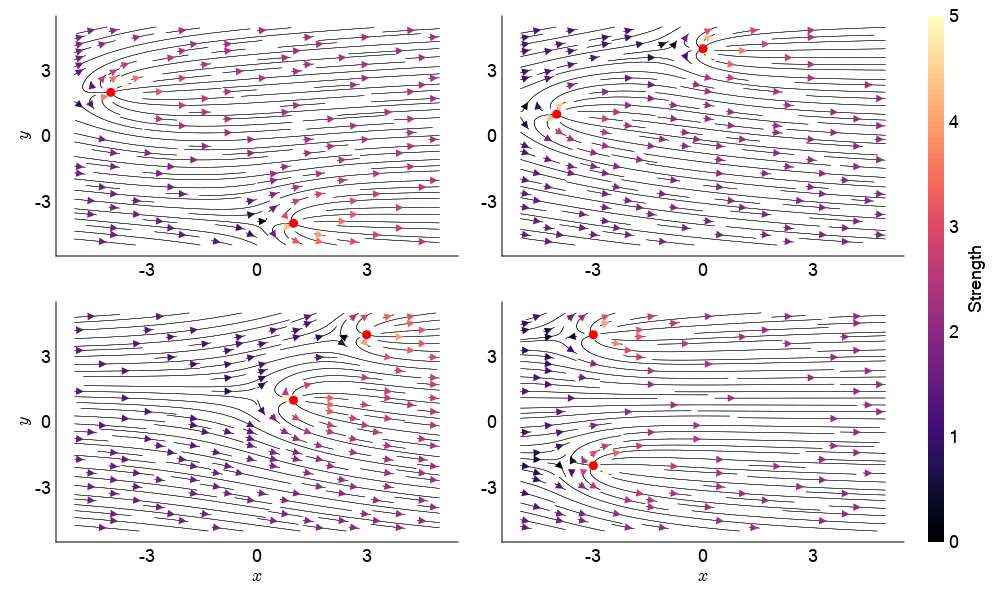

In [136]:
# Building figure
# Creating first axis to plot on
# Setting axis limits
# Defining theme
f = Figure(resolution=(1000, 600))

# Parameters for each of the plots
params = Dict("color" => :black, "colormap" => :magma, "linewidth" => 0.5)

# Generating random fields
fields = []
for i in 1:8
    r = rand(-4:4, 2)
    field = singularity_point("Type", 5.0, r[1], r[2])
    push!(fields, field)
end

# Generating uniform freestreams
freestreams = [freestream(1.0, 0) for _ in 1:4]

##############
### PLOT 1 ###
##############
ax = Axis(f[1, 1], ylabel = L"$y$",)

streamplot!(ax, 
    x -> source_sink_horizontal_freestream(fields[1], fields[2], freestreams[1], x)[1], X, Y,
    color = :black,
    colormap = :magma, 
    linewidth = 0.5
)

for field in [fields[1], fields[2]]
    scatter!(ax, (field.x_pos, field.y_pos), color=:red)
end

##############
### PLOT 2 ###
##############
ax = Axis(f[1, 2])

streamplot!(ax, 
    x -> source_sink_horizontal_freestream(fields[3], fields[4], freestreams[2], x)[1], X, Y,
    color = :black,
    colormap = :magma, 
    linewidth = 0.5
)

for field in [fields[3], fields[4]]
    scatter!(ax, (field.x_pos, field.y_pos), color=:red)
end

##############
### PLOT 3 ###
##############
ax = Axis(f[2, 1], xlabel = L"$x$", ylabel = L"$y$")

streamplot!(ax, 
    x -> source_sink_horizontal_freestream(fields[5], fields[6], freestreams[3], x)[1], X, Y,
    color = :black,
    colormap = :magma, 
    linewidth = 0.5
)

for field in [fields[5], fields[6]]
    scatter!(ax, (field.x_pos, field.y_pos), color=:red)
end

##############
### PLOT 4 ###
##############
ax = Axis(f[2, 2], xlabel = L"$x$")

streamplot!(ax, 
    x -> source_sink_horizontal_freestream(fields[7], fields[8], freestreams[4], x)[1], X, Y,
    color = :black,
    colormap = :magma, 
    linewidth = 0.5
)

for field in [fields[7], fields[8]]
    scatter!(ax, (field.x_pos, field.y_pos), color=:red)
end

################
### COLORBAR ###
################
cb = Colorbar(f[1:2, 3], colormap=:magma, limits=(0.0, 5.0), label="Strength")

# Displaying figure
current_figure()

## Bernoulli's Equation and the Pressure Coefficient

A useful parameter of the flow around a body is the *pressure coefficient*, $C_p$, a dimensionless number which describes the relative pressures throughout a fluid. It is defined as 

$$C_p = \frac{p-p_\infty}{\frac{1}{2}\rho_\infty U_\infty^2}$$

where $p$ is the pressure at which the pressure coefficient is being measured, $p_\infty$ is the pressure of the freestream, $\rho_\infty$ is the fluid density of the freestream, and $U_\infty$ is the freestream velocity as defined earlier. The pressure coefficient is helpful because 

* A $C_p$ of zero indicates that the pressure is the same as the freestream pressure
* A $C_p$ os one corresponds to the stagnation pressure and occurs at a stagnation point

In fluid flow around a body (such as the case of a Rankine oval), the pressure coefficient may be negative and grow even more negative than $-1$, however, it will never exceed $+1$. This is because the highest pressure that may be achieved is the stagnation pressure. 

Quickly, recall Bernoulli's equation which relates the speed of a fluid to its pressure:

$$p + \frac{1}{2}\rho |\textbf{v}|^2 = p_\infty + \frac{1}{2}\rho_\infty U_\infty^2$$

The variables in this equation are defined identically as in the equation for the pressure coefficient, in addition to $|\textbf{v}|$ representing the magnitude of the velocity vector field. You may remember Bernoulli's equation a bit differently from a course on general physics or dynamics. This is because the term $\rho gh$ has been ignored since there is no change in the heights of the Rankine oval in our plot. Bernoulli's equation allows us to rewrite an equation for the pressure coefficient as

$$ C_p = 1 -\left(\frac{|\textbf{v}|}{U_\infty}\right)^2 $$

This is how we'll evaluate the pressure coefficient. Firstly, a heatmap of the pressure coefficient around the Rankine half body is plotted.

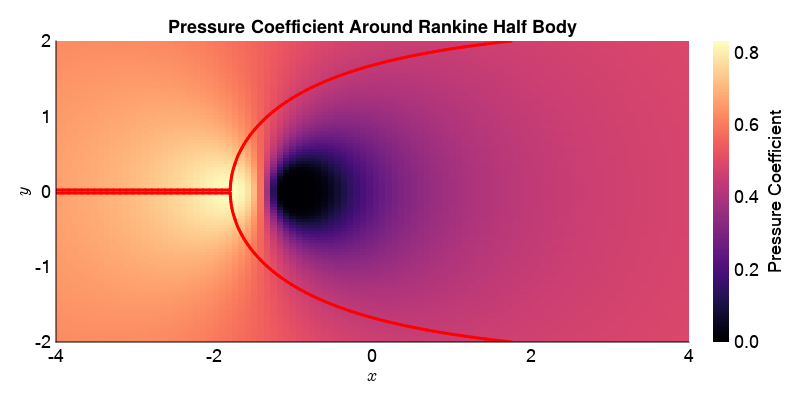

In [198]:
using LaTeXStrings

#Building figure
f = Figure(resolution=(800, 400))
set_theme!(
    theme_minimal(),
    font = "CM Sans Serif",
    fontsize = 18
)

# Axis and limits
ax = Axis(
    f[1,1],
    title = "Pressure Coefficient Around Rankine Half Body", 
    xlabel = L"$x$",
    ylabel = L"$y$"
)
xlims!(minimum(X), maximum(X))
ylims!(minimum(Y), maximum(Y))

# Plotting

# Heat map
# Firstly, the velocity vector field of a source in a freestream is calculated and stored in the matrix Z2
# Using this matrix, the pressure coefficient is computed
Z2 = [source_horizontal_freestream(source_field, fs, Point2(x, y))[1] for x in X, y in Y]
cp = [1.0 - (sqrt(i[1]^2 + i[2]^2) / fs.speed)^2 for i in Z2]
# In order to increase contrast, the pressure coefficient is scaled exponentially
# This is like the reverse of plotting values on a logarithmic scale
cp = [1.5^i for i in cp]
heatmap!(ax, 
    X, Y, cp,
    colormap = :magma, 
)

# Contour 
# Contours are computed for each grid point in the velocity vector field
# Levels are used based on the ones computed earlier
Z = [source_horizontal_freestream(source_field, fs, Point2(x, y))[2] for x in X, y in Y]
contour!(X, Y, Z, 
    levels = [-source_field.strength/2, source_field.strength/2],
    color = :red, 
    linewidth = 3
)

# Colorbar
# Limits on the colorbar are converted back to their original values after being scaled exponentially
cb_limits = (log(minimum(cp), 1.4), log(maximum(cp), 1.4))
cb = Colorbar(f[1, 2], colormap=:magma, limits=cb_limits, label="Pressure Coefficient")

# Displaying figure
current_figure()

A second heatmap of the pressure coefficients for the Rankine oval are computed, using an identical setup as above.

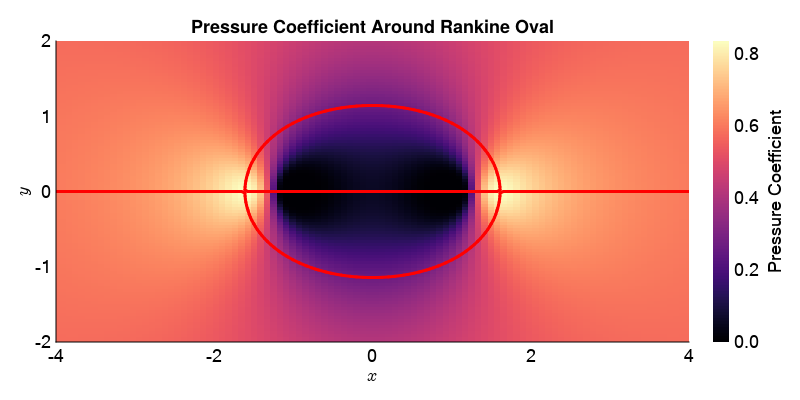

In [197]:
using LaTeXStrings

#Building figure
f = Figure(resolution=(800, 400))
set_theme!(
    theme_minimal(),
    font = "CM Sans Serif",
    fontsize = 18
)
# Axis and limits
ax = Axis(
    f[1,1],
    title = "Pressure Coefficient Around Rankine Oval", 
    xlabel = L"$x$",
    ylabel = L"$y$"
)
xlims!(minimum(X), maximum(X))
ylims!(minimum(Y), maximum(Y))

# Plotting

# Heat map of pressure coefficients
Z2 = [source_sink_horizontal_freestream(source_field, sink_field, fs, Point2(x, y))[1] for x in X, y in Y]
cp = [1.0 - (sqrt(i[1]^2 + i[2]^2) / fs.speed)^2 for i in Z2]
cp = [1.5^i for i in cp] # done to increase contrast
heatmap!(ax, 
    X, Y, cp,
    #color = :black,
    colormap = :magma, 
)

# Contour 
Z = [source_sink_horizontal_freestream(source_field, sink_field, fs, Point2(x, y))[2] for x in X, y in Y]
contour!(X, Y, Z, 
    levels = 1,
    color = :red, 
    linewidth = 3
)

# Colorbar
cb_limits = (log(minimum(cp), 1.4), log(maximum(cp), 1.4))
cb = Colorbar(f[1, 2], colormap=:magma, limits=cb_limits, label="Pressure Coefficient")

# Displaying figure
current_figure()